In [77]:
import os
import pandas as pd
import numpy as np
import itertools
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
Prev_Length	= [30,120]
Match_Score	= [0, 100]
Tile_Size = [0.1, 0.5]
Prev_Type = ['TT', 'AC']
all_combinations = list(itertools.product(
    Prev_Length,
    Match_Score,
    Tile_Size,
    Prev_Type
))
# Convert to DataFrame
combinations_df = pd.DataFrame(all_combinations, columns=['Prev.Length', 'Match.Score','Tile.Size','Prev.Type'])
combinations_df

,Prev.Length,Match.Score,Tile.Size,Prev.Type
0,30,0,0.1,TT
1,30,0,0.1,AC
2,30,0,0.5,TT
3,30,0,0.5,AC
4,30,100,0.1,TT
5,30,100,0.1,AC
6,30,100,0.5,TT
7,30,100,0.5,AC
8,120,0,0.1,TT
9,120,0,0.1,AC


In [79]:
result_2k = pd.read_csv('/Users/yintianyunxi/Desktop/Experiments_MSDS692/RESULTS_YPPEEYVM_CumCondCount=16_2024-01-18.csv')
result_2k.head()

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time
0,30,0,0.1,TT,20.188178
1,30,0,0.1,AC,23.660615
2,30,0,0.5,TT,21.135252
3,30,0,0.5,AC,24.970845
4,30,100,0.1,TT,17.195089


In [80]:
df_2k = result_2k.copy()
df_2k

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time
0,30,0,0.1,TT,20.188178
1,30,0,0.1,AC,23.660615
2,30,0,0.5,TT,21.135252
3,30,0,0.5,AC,24.970845
4,30,100,0.1,TT,17.195089
...,...,...,...,...,...
1595,120,0,0.5,AC,24.136323
1596,120,100,0.1,TT,21.242126
1597,120,100,0.1,AC,24.901036
1598,120,100,0.5,TT,19.163322


In [81]:
col = ["Prev.Length","Match.Score","Tile.Size","Prev.Type"]
df_2k.groupby(col).mean('Browse.Time')

Browse.Time
Prev.Length Match.Score Tile.Size Prev.Type             
30          0           0.1       AC           25.040490
                                  TT           19.948033
                        0.5       AC           24.881009
                                  TT           19.978867
            100         0.1       AC           21.871022
                                  TT           16.864769
                        0.5       AC           21.956341
                                  TT           17.059723
120         0           0.1       AC           25.026023
                                  TT           20.017213
                        0.5       AC           24.724060
                                  TT           19.984869
            100         0.1       AC           24.985661
                                  TT           20.084698
                        0.5       AC           24.814010
                                  TT           20.063257

In [82]:
min(df_2k['Browse.Time'])

13.5321811332763

In [83]:
result_2k.loc[result_2k['Prev.Type'] == 'TT', 'Prev.Type'] = -1
result_2k.loc[result_2k['Prev.Type'] == 'AC', 'Prev.Type'] = 1
result_2k.loc[result_2k['Tile.Size'] == 0.1, 'Tile.Size'] = -1
result_2k.loc[result_2k['Tile.Size'] == 0.5, 'Tile.Size'] = 1
result_2k.loc[result_2k['Match.Score'] == 0, 'Match.Score'] = -1
result_2k.loc[result_2k['Match.Score'] == 100, 'Match.Score'] = 1
result_2k.loc[result_2k['Prev.Length'] == 30, 'Prev.Length'] = -1
result_2k.loc[result_2k['Prev.Length'] == 120, 'Prev.Length'] = 1
result_2k['Tile.Size'] = result_2k['Tile.Size'].astype(int)
result_2k.columns = ['x1','x2','x3','x4','y']
result_2k

,x1,x2,x3,x4,y
0,-1,-1,-1,-1,20.188178
1,-1,-1,-1,1,23.660615
2,-1,-1,1,-1,21.135252
3,-1,-1,1,1,24.970845
4,-1,1,-1,-1,17.195089
...,...,...,...,...,...
1595,1,-1,1,1,24.136323
1596,1,1,-1,-1,21.242126
1597,1,1,-1,1,24.901036
1598,1,1,1,-1,19.163322


In [84]:
# y ~ Prev.Length * Match.Score * Tile.Size * Prev.Type
model = smf.ols('y ~ x1 * x2 * x3 * x4', data = result_2k).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     799.3
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:26:42   Log-Likelihood:                -2289.7
No. Observations:                1600   AIC:                             4611.
Df Residuals:                    1584   BIC:                             4697.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           19.2502      0.036    535.224      0.000      19.180      19.321
x4[T.1]              4.9121      0.051     96.573      0.000       4.812       5.012
x1                   0.7873      0.036     21.891      0.000       0.717       0.858
x1:x4[T.1]          -0.0622      0.051     -1.223      0.221      -0.162       0.038
x2                  -0.7321      0.036    -20.354      0.000      -0.803      -0.662
x2:x4[T.1]          -0.0235      0.051     -0.462      0.644      -0.123       0.076
x1:x2                0.7685      0.036     21.368      0.000       0.698       0.839
x1:x2:x4[T.1]       -0.0006      0.051     -0.011      0.991      -0.100       0.099
x3                   0.0215      0.036      0.598      0.550      -0.049       0.092
x3:x4[T.1]          -0.0900      0.051     -1.769      0.077      -0.190       0.010
x1:x3               -0.0349      0.036     -0.972      0.331      -0.105       0.036
x1:x3:x4[T.1]       -0.0150      0.051     -0.295      0.768      -0.115       0.085
x2:x3                0.0219      0.036      0.608      0.543      -0.049       0.092
x2:x3:x4[T.1]        0.0250      0.051      0.492      0.623      -0.075       0.125
x1:x2:x3            -0.0192      0.036     -0.532      0.594      -0.090       0.051
x1:x2:x3:x4[T.1]     0.0048      0.051      0.095      0.924      -0.095       0.105
==============================================================================
Omnibus:                        2.474   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.390
Skew:                          -0.069   Prob(JB):                        0.303
Kurtosis:                       3.129   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y ~ Prev.Length * Match.Score * Tile.Size * Prev.Type
x4
x1
x2
x1:x2
Prev.Length, Match.Score, Prev.Type, and the interaction of Prev.Length * Match.Score are significant. 

In [85]:
# Hypothesis test here to prove betas = 0 for tile size and other interactions

Text(0.5, 1.0, 'Main Effect: Preview Length')

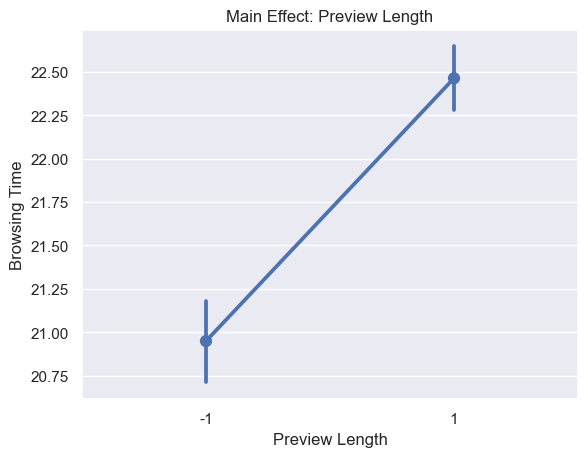

In [86]:
# Prev_Length = [50,100]
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="x1", y="y", data=result_2k)
fig1.set_ylabel("Browsing Time")
fig1.set_xlabel("Preview Length")
fig1.set_title("Main Effect: Preview Length")

Text(0.5, 1.0, 'Main Effect: Match Score')

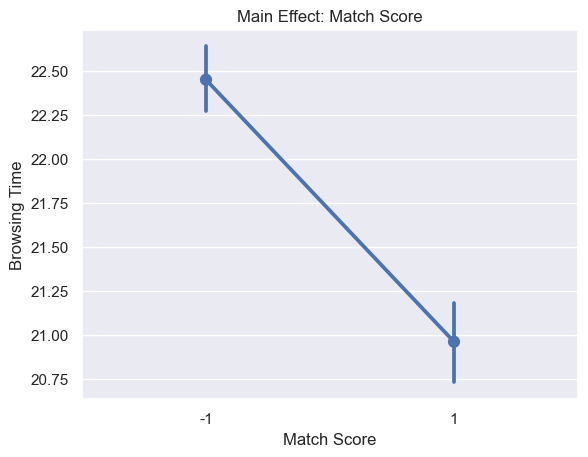

In [87]:
#Match_Score = [40, 90]
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="x2", y="y", data=result_2k)
fig1.set_ylabel("Browsing Time")
fig1.set_xlabel("Match Score")
fig1.set_title("Main Effect: Match Score")

Text(0.5, 1.0, 'Interaction Effect: Preview Length * Match Score')

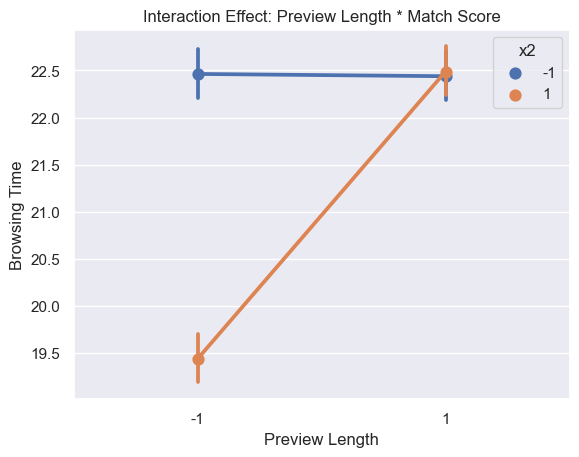

In [88]:
# Interaction between x1 and x2
sns.set_theme(style="darkgrid")
fig12 = sns.pointplot(x="x1", hue="x2", y="y",data=result_2k)
fig12.set_ylabel("Browsing Time")
fig12.set_xlabel("Preview Length")
fig12.set_title("Interaction Effect: Preview Length * Match Score")

Text(0.5, 0, 'Preview Type')

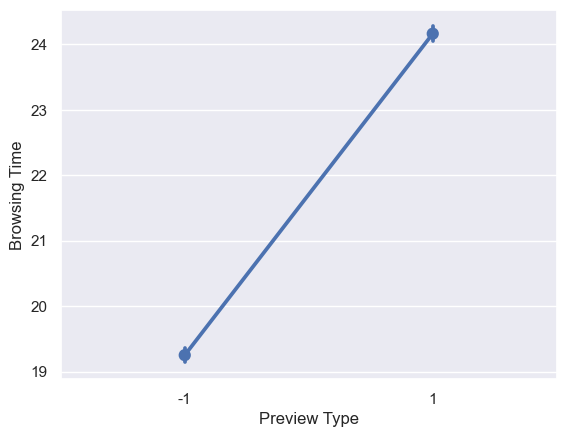

In [89]:
#Prev_Type = ['TT', 'AC']
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="x4", y="y", data=result_2k)
fig1.set_ylabel("Browsing Time")
fig1.set_xlabel("Preview Type")

Text(0.5, 0, 'Tile Size')

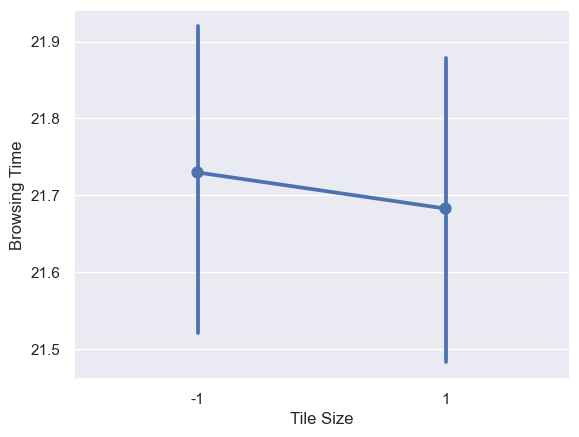

In [90]:
#Tile_Size = [0.1, 0.3]
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="x3", y="y", data=result_2k)
fig1.set_ylabel("Browsing Time")
fig1.set_xlabel("Tile Size")

In [91]:
Prev_Length	= [30,50,75]
Match_Score	= [50,75,100]
Tile_Size = [0.2]
Prev_Type = ['TT']
all_combinations = list(itertools.product(
    Prev_Length,
    Match_Score,
    Tile_Size,
    Prev_Type
))
# Convert to DataFrame
combinations_df = pd.DataFrame(all_combinations, columns=['Prev.Length', 'Match.Score','Tile.Size','Prev.Type'])
combinations_df

,Prev.Length,Match.Score,Tile.Size,Prev.Type
0,30,50,0.2,TT
1,30,75,0.2,TT
2,30,100,0.2,TT
3,50,50,0.2,TT
4,50,75,0.2,TT
5,50,100,0.2,TT
6,75,50,0.2,TT
7,75,75,0.2,TT
8,75,100,0.2,TT


In [92]:
result_33 = pd.read_csv('/Users/yintianyunxi/Desktop/Experiments_MSDS692/RESULTS_YPPEEYVM_CumCondCount=25_2024-01-18.csv')
result_33.head()

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time
0,30,50,0.2,TT,15.629094
1,30,75,0.2,TT,13.697404
2,30,100,0.2,TT,17.266329
3,50,50,0.2,TT,17.168645
4,50,75,0.2,TT,12.067067


In [93]:
col = ["Prev.Length","Match.Score","Tile.Size","Prev.Type"]
result_33.groupby(col).mean('Browse.Time')

Browse.Time
Prev.Length Match.Score Tile.Size Prev.Type             
30          50          0.2       TT           16.760994
            75          0.2       TT           15.209323
            100         0.2       TT           16.948563
50          50          0.2       TT           17.162532
            75          0.2       TT           12.265183
            100         0.2       TT           14.739565
75          50          0.2       TT           15.837855
            75          0.2       TT            9.902472
            100         0.2       TT           16.761490

In [94]:
col = ["Prev.Length","Match.Score","Tile.Size","Prev.Type"]
df_2k.groupby(col).mean('Browse.Time')

Browse.Time
Prev.Length Match.Score Tile.Size Prev.Type             
30          0           0.1       AC           25.040490
                                  TT           19.948033
                        0.5       AC           24.881009
                                  TT           19.978867
            100         0.1       AC           21.871022
                                  TT           16.864769
                        0.5       AC           21.956341
                                  TT           17.059723
120         0           0.1       AC           25.026023
                                  TT           20.017213
                        0.5       AC           24.724060
                                  TT           19.984869
            100         0.1       AC           24.985661
                                  TT           20.084698
                        0.5       AC           24.814010
                                  TT           20.063257

Prev.Length = 50 \
Match.Score = 80 \
"Tile.Size" = 0.2\
"Prev.Type" = TT

## Second Approach

In [95]:
def convertNtoC(U, UH, UL):
    x = (U - (UH+UL)/2) / ((UH-UL)/2)  
    return x

def convertCtoN(x, UH, UL):
    U = x*(UH-UL)/2 + (UH+UL)/2
    return U

x1 Prev.Length = 50 \
x2 Match.Score = 80 \
x3 "Tile.Size" = 0.2\
x4 "Prev.Type" = TT
Prev_Length	= [50,100]
Match_Score	= [40, 90]
Tile_Size = [0.1, 0.3]
Prev_Type = ['TT', 'AC']

In [96]:
x1_c = convertNtoC(U=result_33['Prev.Length'], UH=75, UL=30)
x2_c = convertNtoC(U=result_33['Match.Score'], UH=100, UL=50)
result_33['x1'] = x1_c
result_33['x2'] = x2_c
result_33['y'] = result_33['Browse.Time']
result_33

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time,x1,x2,y
0,30,50,0.2,TT,15.629094,-1.000000,-1.0,15.629094
1,30,75,0.2,TT,13.697404,-1.000000,0.0,13.697404
2,30,100,0.2,TT,17.266329,-1.000000,1.0,17.266329
3,50,50,0.2,TT,17.168645,-0.111111,-1.0,17.168645
4,50,75,0.2,TT,12.067067,-0.111111,0.0,12.067067
...,...,...,...,...,...,...,...,...
895,50,75,0.2,TT,11.542880,-0.111111,0.0,11.542880
896,50,100,0.2,TT,14.549224,-0.111111,1.0,14.549224
897,75,50,0.2,TT,14.986524,1.000000,-1.0,14.986524
898,75,75,0.2,TT,10.444962,1.000000,0.0,10.444962


In [97]:
model = smf.ols('y ~ x1 + x2 + x1:x2 + I(x1**2) + I(x2**2)', data = result_33).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     348.7
Date:                Fri, 19 Jan 2024   Prob (F-statistic):          3.64e-207
Time:                        18:26:43   Log-Likelihood:                -1630.2
No. Observations:                 900   AIC:                             3272.
Df Residuals:                     894   BIC:                             3301.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9893      0.112    107.269      0.000      11.770      12.209
x1            -1.0695      0.061    -17.635      0.000      -1.189      -0.950
x2            -0.2098      0.061     -3.456      0.001      -0.329      -0.091
x1:x2          0.2382      0.074      3.213      0.001       0.093       0.384
I(x1 ** 2)     0.6411      0.107      6.016      0.000       0.432       0.850
I(x2 ** 2)     3.9095      0.105     37.218      0.000       3.703       4.116
==============================================================================
Omnibus:                       10.860   Durbin-Watson:                   2.788
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.140
Skew:                          -0.048   Prob(JB):                       0.0282
Kurtosis:                       2.574   Cond. No.                         4.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

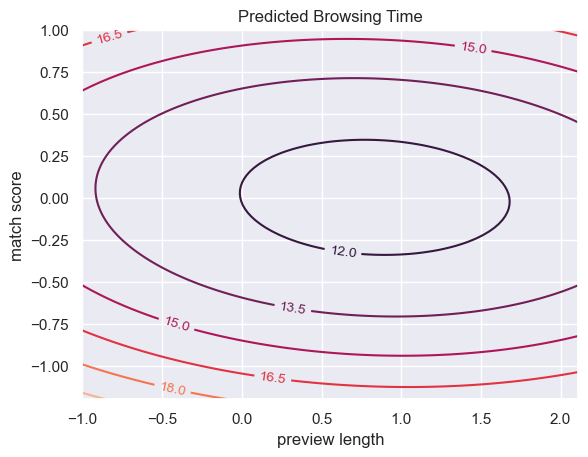

In [98]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = 30, UH = 75, UL = 30), 
                                 convertNtoC(U = 100, UH = 75, UL = 30), 100), 
                     np.linspace(convertNtoC(U = 45, UH = 100, UL = 50), 
                                 convertNtoC(U = 100, UH = 100, UL = 50), 100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
h = plt.contour(x1, x2, eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('preview length')
plt.ylabel('match score')
plt.title('Predicted Browsing Time')
plt.show()

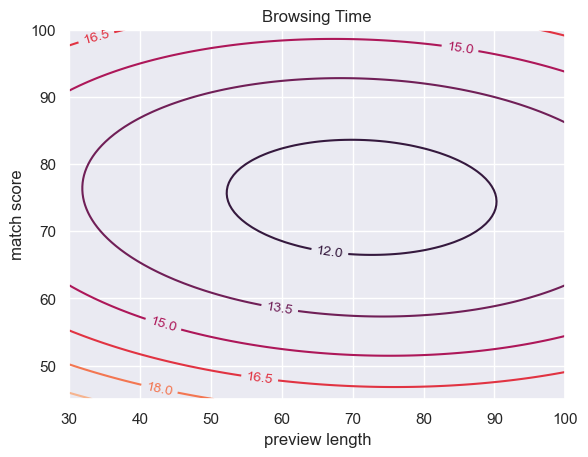

In [99]:
h = plt.contour(convertCtoN(x1, UH=75, UL=30),
                convertCtoN(x2, UH=100, UL=50), eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('preview length')
plt.ylabel('match score')
plt.title('Browsing Time')
plt.show()

In [100]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Booking rate is maximized when x1=", x_s[0], "and x2=", x_s[1])

Booking rate is maximized when x1= [[0.83384882]] and x2= [[0.00143071]]


In [101]:
xsN_1 = convertCtoN(x = x_s[0], UH = 75, UL = 30)
xsN_2 = convertCtoN(x = x_s[1], UH=100, UL=50)
print("Preview length=", xsN_1, ", Match score=", xsN_2)

Preview length= [[71.26159849]] , Match score= [[75.03576765]]


In [102]:
eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b)
print(eta_s)

[[11.54328443]]


In [103]:
results = []

for pl in [60, 65, 70, 75, 80]:
    for ms in range(67, 84):
        yhat = model.predict(exog=dict(x1=convertNtoC(U=pl, UH=75, UL=30), 
                                        x2=convertNtoC(U=ms, UH=100, UL=50)))
        results.append((pl, ms, yhat))

# Sort the results based on yhat and get the smallest 5
sorted_results = sorted(results, key=lambda x: x[2][0])[:5]

# Output the smallest 5 yhat along with corresponding pl and ms
for pl, ms, yhat in sorted_results:
    print(f'Preview length: {pl}, match score: {ms}, predicted y: {yhat}')


Preview length: 70, match score: 75, predicted y: 0    11.545327
dtype: float64
Preview length: 70, match score: 76, predicted y: 0    11.550601
dtype: float64
Preview length: 70, match score: 74, predicted y: 0    11.552564
dtype: float64
Preview length: 75, match score: 75, predicted y: 0    11.560934
dtype: float64
Preview length: 75, match score: 74, predicted y: 0    11.566054
dtype: float64


In [104]:
result_tt = pd.read_csv('/Users/yintianyunxi/Desktop/Experiments_MSDS692/combined_df.csv')
result_tt.head()

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time
0,30,0,0.1,TT,20.188178
1,30,0,0.5,TT,21.135252
2,30,100,0.1,TT,17.195089
3,30,100,0.5,TT,18.010139
4,120,0,0.1,TT,18.654681


In [105]:

x1_c = convertNtoC(U=result_tt['Prev.Length'], UH=100, UL=30)
x2_c = convertNtoC(U=result_tt['Match.Score'], UH=90, UL=20)
result_tt['x1'] = x1_c
result_tt['x2'] = x2_c
result_tt['y'] = result_tt['Browse.Time']
result_tt

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time,x1,x2,y
0,30,0,0.1,TT,20.188178,-1.000000,-1.571429,20.188178
1,30,0,0.5,TT,21.135252,-1.000000,-1.571429,21.135252
2,30,100,0.1,TT,17.195089,-1.000000,1.285714,17.195089
3,30,100,0.5,TT,18.010139,-1.000000,1.285714,18.010139
4,120,0,0.1,TT,18.654681,1.571429,-1.571429,18.654681
...,...,...,...,...,...,...,...,...
1695,50,75,0.2,TT,11.542880,-0.428571,0.571429,11.542880
1696,50,100,0.2,TT,14.549224,-0.428571,1.285714,14.549224
1697,75,50,0.2,TT,14.986524,0.285714,-0.142857,14.986524
1698,75,75,0.2,TT,10.444962,0.285714,0.571429,10.444962


In [106]:
model_tt = smf.ols('y ~ x1 + x2 + x1:x2 + I(x1**2) + I(x2**2)', data = result_tt).fit()
model_tt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     637.6
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:26:43   Log-Likelihood:                -3391.3
No. Observations:                1700   AIC:                             6795.
Df Residuals:                    1694   BIC:                             6827.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7517      0.093    147.518      0.000      13.569      13.934
x1            -0.4711      0.055     -8.503      0.000      -0.580      -0.362
x2            -0.5043      0.041    -12.398      0.000      -0.584      -0.425
x1:x2          0.4765      0.032     14.724      0.000       0.413       0.540
I(x1 ** 2)     1.9999      0.076     26.410      0.000       1.851       2.148
I(x2 ** 2)     1.0242      0.060     17.068      0.000       0.906       1.142
==============================================================================
Omnibus:                       64.534   Durbin-Watson:                   2.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.876
Skew:                          -0.388   Prob(JB):                     2.25e-19
Kurtosis:                       3.780   Cond. No.                         5.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
model_tt.params

Intercept     13.751660
x1            -0.471103
x2            -0.504303
x1:x2          0.476488
I(x1 ** 2)     1.999910
I(x2 ** 2)     1.024187
dtype: float64

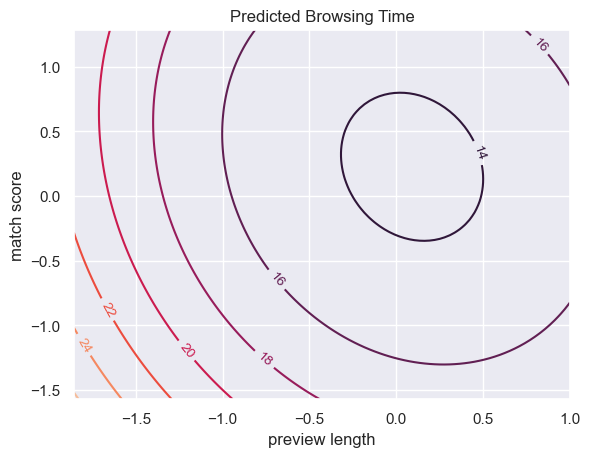

In [108]:
beta0 = model_tt.params[0]
beta1 = model_tt.params[1]
beta2 = model_tt.params[2]
beta12 = model_tt.params[3]
beta11 = model_tt.params[4]
beta22 = model_tt.params[5]
x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = 0, UH=100, UL=30), 
                                 convertNtoC(U = 100, UH=100, UL=30), 100), 
                     np.linspace(convertNtoC(U = 0, UH = 90, UL = 20), 
                                 convertNtoC(U = 100, UH = 90, UL = 20), 100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
h = plt.contour(x1, x2, eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('preview length')
plt.ylabel('match score')
plt.title('Predicted Browsing Time')
plt.show()

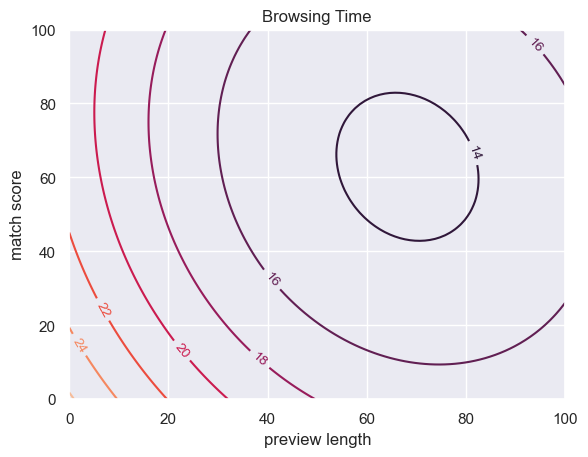

In [109]:
h = plt.contour(convertCtoN(x1, UH=100, UL=30),
                convertCtoN(x2, UH=90, UL=20), eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('preview length')
plt.ylabel('match score')
plt.title('Browsing Time')
plt.show()

In [110]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Booking rate is maximized when x1=", x_s[0], "and x2=", x_s[1])
xsN_1 = convertCtoN(x = x_s[0], UH=100, UL=30)
xsN_2 = convertCtoN(x = x_s[1], UH=90, UL=20)
print("Preview length=", xsN_1, ", Match score=", xsN_2)

Booking rate is maximized when x1= [[0.09097338]] and x2= [[0.22503443]]
Preview length= [[68.18406842]] , Match score= [[62.87620496]]


In [111]:
eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b)
print(eta_s)
yhat = model_tt.predict(exog=dict(x1=convertNtoC(U=68, UH=100, UL=30), 
                                        x2=convertNtoC(U=62, UH=90, UL=20)))
yhat

[[13.67348818]]


0    13.674248
dtype: float64

In [112]:
results = []

for pl in [60, 65, 70, 75, 80]:
    for ms in range(55, 70):
        yhat = model_tt.predict(exog=dict(x1=convertNtoC(U=pl,UH=100, UL=30), 
                                        x2=convertNtoC(U=ms, UH=90, UL=20)))
        results.append((pl, ms, yhat))

# Sort the results based on yhat and get the smallest 5
sorted_results = sorted(results, key=lambda x: x[2][0])[:5]

# Output the smallest 5 yhat along with corresponding pl and ms
for pl, ms, yhat in sorted_results:
    print(f'Preview length: {pl}, match score: {ms}, predicted y: {yhat}')

Preview length: 70, match score: 62, predicted y: 0    13.678895
dtype: float64
Preview length: 70, match score: 63, predicted y: 0    13.678972
dtype: float64
Preview length: 70, match score: 61, predicted y: 0    13.68049
dtype: float64
Preview length: 70, match score: 64, predicted y: 0    13.680721
dtype: float64
Preview length: 70, match score: 60, predicted y: 0    13.683757
dtype: float64


In [113]:
result_final = pd.read_csv('/Users/yintianyunxi/Desktop/Experiments_MSDS692/RESULTS_YPPEEYVM_CumCondCount=27_2024-01-18.csv')
result_final.groupby(col).mean('Browse.Time')

,,,,Browse.Time
Prev.Length,Match.Score,Tile.Size,Prev.Type,
70,75,0.2,TT,10.472357
80,75,0.2,TT,10.389723
